In [38]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [22]:
# Loading the cleaned dataset
df = pd.read_csv("cleaned_student_depression.csv")

In [23]:
# Showing first few rows
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,...,Degree_Ma,Degree_Mba,Degree_Mbbs,Degree_Mca,Degree_Md,Degree_Me,Degree_Mhm,Degree_Msc,Degree_Others,Degree_Phd
0,1,33.0,5.0,8.97,2.0,1,3.0,1.0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,0,24.0,2.0,5.90,5.0,0,3.0,2.0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,1,31.0,3.0,7.03,5.0,0,9.0,1.0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,0,28.0,3.0,5.59,2.0,1,4.0,5.0,1,1,...,False,False,False,False,False,False,False,False,False,False
4,0,25.0,4.0,8.13,3.0,1,1.0,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Basic feature engineering
if 'Screen_Time' in df.columns and 'Sleep_Duration' in df.columns:
    df['Lifestyle_Score'] = df['Screen_Time'] / (df['Sleep_Duration'] + 1)

if 'Age' in df.columns:
    df['Age_Group'] = pd.cut(df['Age'],
                             bins=[0, 18, 25, 35, 100],
                             labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

    df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)


In [25]:
# Spliting the dataset into features (X) and target (y)
X = df.drop("Depression", axis=1)
y = df["Depression"]

In [26]:
# Spliting the data into training and test sets(80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
# Making predictions on the test set
y_pred = model.predict(X_test)

Accuracy: 0.8376390383925367


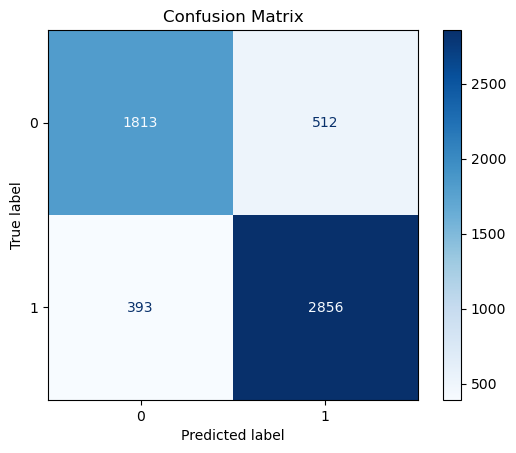


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2325
           1       0.85      0.88      0.86      3249

    accuracy                           0.84      5574
   macro avg       0.83      0.83      0.83      5574
weighted avg       0.84      0.84      0.84      5574



In [45]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", colorbar=True)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Hyperparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Creating base model
rf = RandomForestClassifier(random_state=42)

# Finding best parameters
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Show best parameters and accuracy
print("Best Parameters :-", grid_search.best_params_)
print("Best Cross-Validation Accuracy :-", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Best Parameters :- {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Accuracy :- 0.8451153528721029



Test Accuracy: 0.8408683171869393


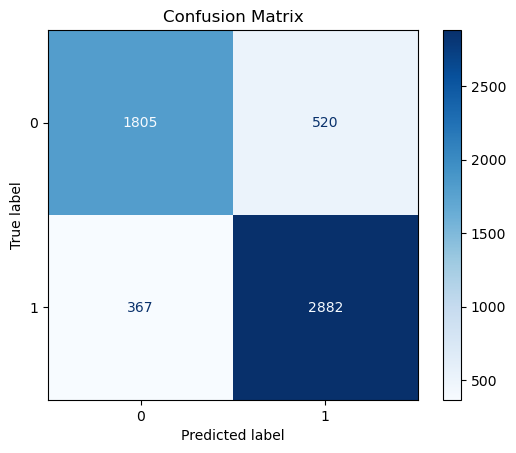


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2325
           1       0.85      0.89      0.87      3249

    accuracy                           0.84      5574
   macro avg       0.84      0.83      0.83      5574
weighted avg       0.84      0.84      0.84      5574



In [40]:


# Use the best model found by GridSearch
best_model = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_model.predict(X_test)

# Evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
disp = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


The tuned model achieved a slightly higher accuracy from 83.76% to 84.09% and improved recall for the positive class. Showing better detection of depression.So the tuned model is better overall.